# Data Intelligence Exam

**Youssef Wassim Noureddine** | yono@itu.dk | Date: 2025-05-26  

## Introduction

This report analyses data from the 1994 U.S. Census, which includes information about people’s age, education, job, income, and more. The dataset gives a picture of life in the U.S. at the time and can help us understand how different factors, like education or working hours, relate to income levels.

The data reflects important social and cultural issues, such as inequality and the structure of the job market in the 1990s. By analyzing this data, we can see which groups of people were more likely to earn higher or lower incomes and why.

In the report, I will go through the following steps:

1. Describe the data and its features  
2. Ask a question based on the data and suggest a possible answer (hypothesis)  
3. Clean and analyze the data using Python  
4. Show results using graphs and explain what they mean  
5. Discuss the findings and reflect on what they tell us about society

The goal is to use data to explore real-world patterns and understand what they might say about life in the U.S. in 1994.


## Loading and overview

### Loading the dataset

We start by importing the necessary libraries for loading the dataset

In [2]:
import pandas as pd

We load the dataset with pandas by using the `read_csv` method

In [3]:
df = pd.read_csv("census-1994.csv")

We can use `head()` to see the first 5 rows to make sure the dataset is read

In [5]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


This is the description given with the data:

Census data from USA gathered in 1994. Contains demographic information
about US citizens. These values are self-reported by the participating
citizens.

- age: Age of the person
- workclass: Type of employment of the person
- education: Education of the person
- marital_status: Civil status of the person
- occupation: The person's job
- relationship: The person's position in a family
- race: Note: The race category in US censuses is self-reported but with
  given possible values. These have changed over time.
- gender: This value is also restricted by the census form.
- capital_gain: How much the person made selling assets
- capital_loss: How much the person lost selling assets
- hours_per_week: How many hours the person works per week
- native_country: The native country of the person
- income_bracket: Whether the person earns more or less than 50.000 USD
  a year

### Describing the variables

We can start by using `info()` method to get basic info about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   gender          32561 non-null  object
 8   capital_gain    32561 non-null  int64 
 9   capital_loss    32561 non-null  int64 
 10  hours_per_week  32561 non-null  int64 
 11  native_country  32561 non-null  object
 12  income_bracket  32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


Here we can see there is 12 columns, 4 numerical and 8 categorical.

#### Describing Numerical Variables

We start by looking at the numerical columns

In [8]:
df.describe()

,age,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Using `df.describe()`, we observed the following:

The dataset contains four numerical variables: `age`, `capital_gain`, `capital_loss`, and `hours_per_week`.

- **age**: The average age is approximately 38.6 years, with a minimum of 17 and a maximum of 90. The distribution appears to be right-skewed, with most individuals clustered around the 30–40 age range.

- **capital_gain**: The average capital gain is 1077, but the median is 0, indicating that the majority of individuals reported no capital gain. The high maximum value (99999) and large standard deviation suggest the presence of a few outliers with substantial gains.

- **capital_loss**: Similar to capital gain, most individuals reported no capital loss (median = 0). The average loss is low (~87), but the maximum value (4356) indicates a few notable cases. This variable is also heavily skewed.

- **hours_per_week**: The average person works about 40.4 hours per week. The distribution is centered around 40 hours, with a minimum of 1 and a maximum of 99. This aligns with typical full-time work schedules, though a few extreme values suggest part-time or overtime work.



#### Describing Categorial Variables


In [17]:
df.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income_bracket
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,17,7,15,6,5,3,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10199,14976,4140,13193,27816,20741,29170,24720


Using `df.describe(include="object")`, which, we observed the following:

- **workclass**: Contains 9 unique categories. The most frequent is "Private", which makes up 22,696 of the 32,561 entries, suggesting that the private sector dominates the employment landscape in this dataset.

- **education**: Has 17 unique levels. "HS-grad" is the most common, appearing 10,199 times, indicating a high proportion of individuals with a high school diploma.

- **marital_status**: 7 unique categories, with "Married-civ-spouse" being the most frequent at 14,976. This suggests many individuals in the dataset are married.

- **occupation**: Includes 15 different job categories. The most common is "Prof-specialty" with 4,140 entries, showing a concentration in professional occupations.

- **relationship**: 6 unique values. "Husband" is the top category (13,193), reflecting traditional family roles.

- **race**: There are 5 race categories, with "White" being dominant (27,816), consistent with the demographic makeup of the U.S. in 1994.

- **gender**: 3 categories are listed (likely including some data noise), but "Male" is the most frequent with 20,741 entries.

- **native_country**: Highly diverse with 42 unique countries represented. However, "United-States" dominates (29,170 out of 32,561), indicating a mostly domestic population with some international representation.

- **income_bracket**: Binary classification. `<=50K` is the top category, appearing 24,720 times, showing that most individuals earn under $50,000 per year.


To further investigate the `gender` column, we use the `.unique()` method to inspect all distinct values. This helps identify any unexpected or placeholder entries.

In [35]:
df['gender'].unique()

array([' Male', ' Female', ' ?'], dtype=object)

After running .unique(), we observe an unexpected value `?`, which likely represents missing or unreported data.

Having completed the initial data description, we now move on to exploring the dataset in greater depth.

# Exploration

We begin by importing the necessary libraries for data exploration.

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Age distribution

We start by visualizing the distribution of the age column to understand the `age` demographics of individuals in the dataset. This can help us identify if certain age groups are overrepresented or underrepresented, and whether the distribution is balanced or skewed.

We visualize the distribution in a histogram. We created the histogram using the `histplot()` function from the Seaborn library, which is useful for visualizing the distribution of numeric data. We set `kde=True` to add a smooth curve showing the overall shape of the distribution, and bins=30 to divide the data into 30 age intervals.

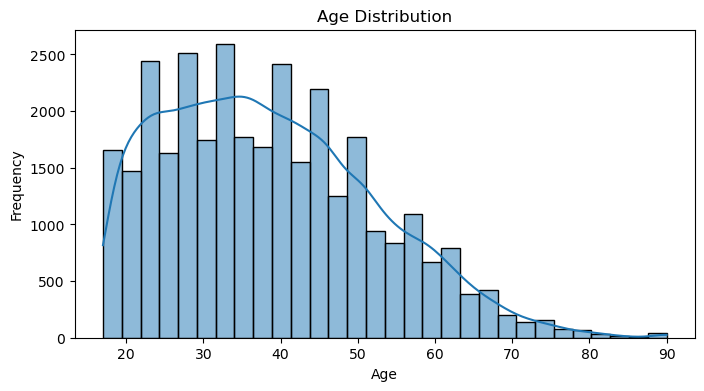

In [46]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution is right-skewed, with most individuals between 20 and 50 years old. There is a noticeable drop in frequency after age 60, and very few people are older than 80. This suggests the dataset is mostly composed of working-age individuals, which aligns with the focus on employment and income.

## Hours per week distribution

Next, we explore the `hours_per_week` column to understand how much people work on average. This can reveal whether most individuals work full-time, part-time, or have unusual working hours. It may also help identify outliers or patterns related to work intensity in the population.

We use the `histplot()` function from Seaborn again to create a histogram of weekly working hours. As before, we include a kernel density curve `(kde=True)` to better visualize the overall shape of the distribution, and divide the data into 30 bins for granularity.

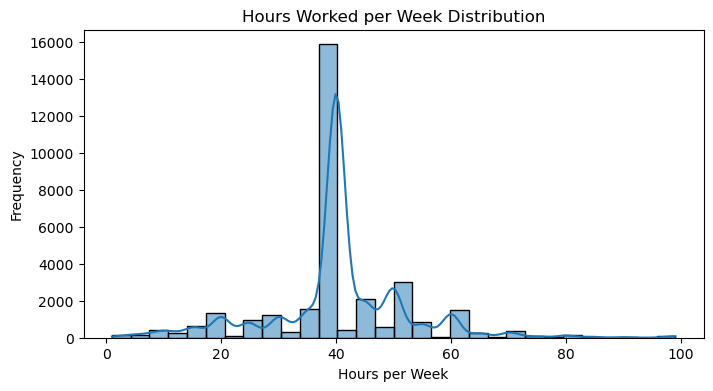

In [47]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='hours_per_week', kde=True, bins=30)
plt.title('Hours Worked per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


The distribution of `hours_per_week` is centered around 40 hours, which aligns with standard full-time employment in the U.S. There are smaller peaks at 20 hours and 60 hours, likely representing part-time workers and individuals working extended hours. The long tail toward higher values suggests that some individuals may be working significantly more than average, potentially due to multiple jobs or overtime. Overall, the majority of the dataset represents typical full-time workers.



## Hours worked by income bracket

Now that we've seen the overall distribution of working hours, we want to investigate whether working more hours is associated with earning more. To do this, we compare `hours_per_week` across the two income brackets `(<=50K and >50K)`. This can help us understand if there's a clear difference in working hours between low- and high-income individuals.

We use a boxplot from Seaborn to compare the distribution of `hours_per_week` for each income group. Boxplots are useful for showing medians, spread, and outliers in numerical data across categories.

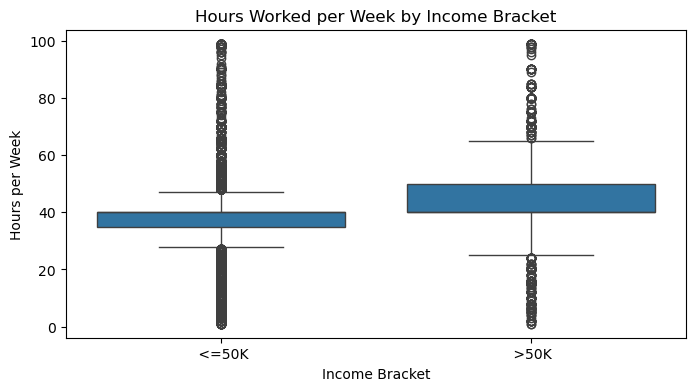

In [48]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='income_bracket', y='hours_per_week')
plt.title('Hours Worked per Week by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Hours per Week')
plt.show()


The boxplot shows that individuals earning more than 50K tend to work more hours per week on average than those earning $50K or less. The median is slightly higher, and the overall range of hours is wider for the higher-income group. However, there is still significant overlap between the two groups, with many individuals in the lower income bracket also working 40+ hours per week. This suggests that while working more hours may be correlated with earning more, it is not the only factor influencing income.

## Education vs Income

Education is often considered a key factor influencing income. Therefore, by comparing education levels with income brackets, we can explore whether individuals with higher education are more likely to earn over $50K per year. This comparison helps us understand the potential impact of education on income distribution in the dataset.

### Education level distribution


We start by examining how education is distributed across the dataset. This helps us see which education levels are most common and provides context before comparing with income.

We use Seaborn’s `countplot()` to show how many individuals fall into each education level.

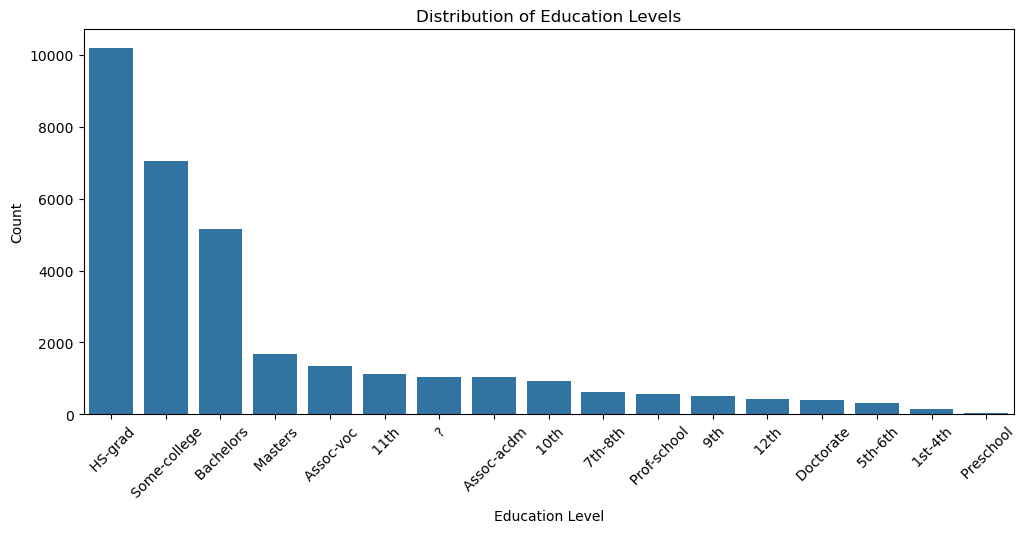

In [49]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The most common education levels in the dataset are HS-grad, Some-college, and Bachelors. This suggests that a large portion of the population has at least a high school diploma or some higher education, which is useful context when analyzing income.



Now that we understand the education distribution, we want to see how it relates to income. This can help reveal whether higher education is associated with a greater likelihood of earning more than $50K.

We use a `countplot()` with the hue set to `income_bracket` to compare income levels within each education group.

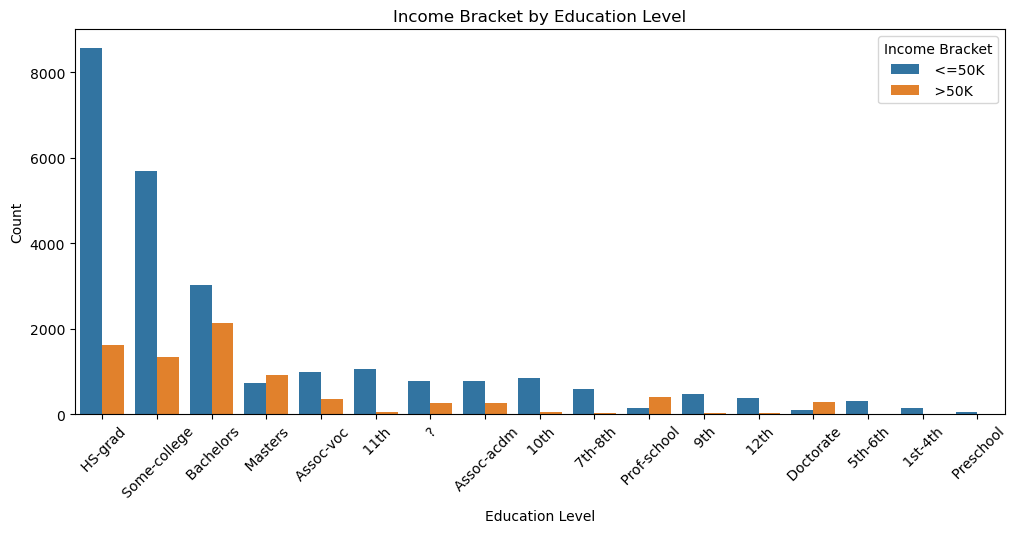

In [50]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='education', hue='income_bracket', order=df['education'].value_counts().index)
plt.title('Income Bracket by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income Bracket')
plt.show()


We can see a clear pattern: people with higher education levels like a bachelor's, master's, or doctorate are more likely to earn over 50K. On the other hand, those with lower education levels mostly fall into the $50K or less group. This suggests that having more education is often linked to earning a higher income.

## Capital gain distribution

The `capital_gain` column represents how much profit individuals made from selling assets, such as stocks or property. We want to explore how these gains are distributed, as they can indicate wealth levels and potentially relate to higher income brackets.

We use Seaborn’s `histplot()` to visualize the distribution of `capital_gain`. Since most values are zero and a few are very large, we apply a log transformation (log1p, i.e. log(x + 1)) to better visualize the spread without being overwhelmed by outliers.<sup>1</sup>

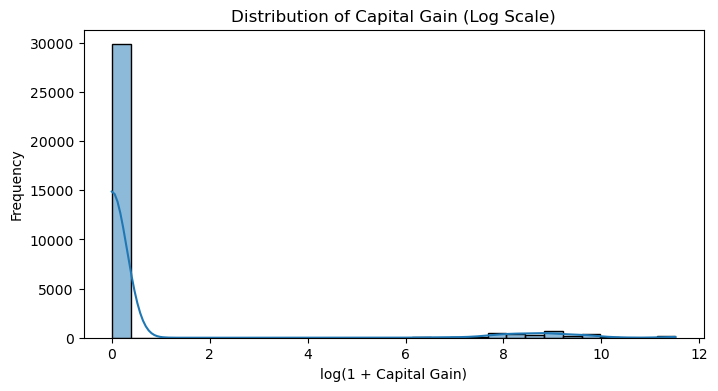

In [52]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='capital_gain_log', bins=30, kde=True)
plt.title('Distribution of Capital Gain (Log Scale)')
plt.xlabel('log(1 + Capital Gain)')
plt.ylabel('Frequency')
plt.show()


As expected, most individuals have zero capital gain, indicating they likely didn’t earn income from investments. A small group has higher values, with sharp peaks at common gain thresholds (e.g., 3,000 or 10,000+). This suggests only a minority of the population benefits from capital income, and those who do may belong to wealthier groups. The log scale<sup>1</sup> makes it easier to visualize this skewed distribution.

## Capital gain by income bracket

After visualizing the overall distribution of capital gain, we now want to compare capital gains across income groups. This can help reveal whether individuals earning more than $50K are also more likely to have income from investments or asset sales.

We use a boxplot to compare the (log-transformed) capital_gain for each income bracket. The log transformation (log1p) helps reduce the effect of extreme outliers and makes patterns more visible.<sup>1</sup>

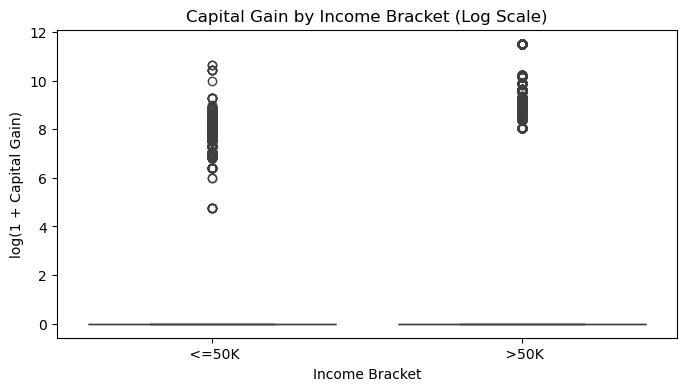

In [55]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='income_bracket', y='capital_gain_log')
plt.title('Capital Gain by Income Bracket (Log Scale)')
plt.xlabel('Income Bracket')
plt.ylabel('log(1 + Capital Gain)')
plt.show()


The boxplot shows that most individuals in both income brackets have 0 capital gain (flat baseline). However, among those who do report gains, the >50K income group clearly includes more individuals with higher values. This suggest that capital gains are more common among higher-income individuals.

# Research questions and hypothesis

## Preprocessing

First we need to clean the data to make the values are valid.

### Dropping rows with `?` as value

Some columns in the dataset, such as gender, contain missing values represented by the placeholder `?`. We are going to remove these rows, to make sure that our analysis is based on complete and reliable data. Since only a small part of the dataset will be removed, this should not affect the results in a meaningful way.

First we will find all the columns that contains the string `?`.

In [62]:
for col in df.columns:
    if df[col].dtype == 'object' and df[col].str.contains(' \?').any():
        print(col)

workclass
education
occupation
gender
native_country


The following columns contains the string `?`.

Now we replace `?` with `NaN` and then we can use `.dropna()` to delete all the rows with missing values

In [68]:
df.replace(' ?', np.nan, inplace=True)
df = df.dropna()

In [69]:
df.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income_bracket
count,27787,27787,27787,27787,27787,27787,27787,27787,27787
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,20541,9085,13003,3730,11535,23922,18787,25350,20824


### Strip extra spaces and lowercase categorical Strings

To ensure consistency and avoid duplicate categories, we strip leading/trailing spaces and convert all strings to lowercase.

In [73]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


In [75]:
df.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income_bracket
count,27787,27787,27787,27787,27787,27787,27787,27787,27787
unique,7,16,7,14,6,5,2,41,2
top,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,united-states,<=50k
freq,20541,9085,13003,3730,11535,23922,18787,25350,20824


After preprocessing we can now proceed to our first hypothesis

## Hypothesis: The Overwork Premium

 "Individuals working more than 40 hours per week are more likely to earn >50K." 

We start by creating a new dataframe to isolate the logic for the hypothesis:

In [76]:
df_h1 = df.copy()

Then we create a new categorical varIable for working hours, that labels each person as either `standard` or `long` based on their `hours_per_week`. This makes it easier to group and visualize.

In [77]:
df_h1['work_hours_category'] = df_h1['hours_per_week'].apply(
    lambda x: 'long' if x > 40 else 'standard'
)

In [79]:
df_h1.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,capital_gain_log,work_hours_category
0,39,state-gov,bachelors,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k,7.684784,standard
1,50,self-emp-not-inc,bachelors,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k,0.000000,standard
2,38,private,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k,0.000000,standard
3,53,private,11th,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k,0.000000,standard
4,28,private,bachelors,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k,0.000000,standard


To see how icome brackets are distributed withing each work hours group. We use `.groupby()` alng with `.value.counts(normalize=True)` (converts the counts into percentages). This gives us proportion of people earning >50K and <=50K in each category, rather than just the raw counts.<sup>1</sup>

In [80]:
df_h1.groupby('work_hours_category')['income_bracket'].value_counts(normalize=True).unstack()


income_bracket,<=50k,>50k
work_hours_category,,
long,0.591006,0.408994
standard,0.818897,0.181103


Now we can visualize the result using searborn `.countplot()`

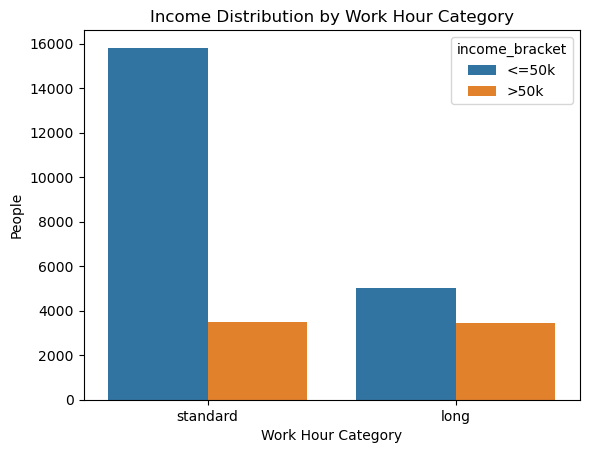

In [120]:
sns.countplot(data=df_h1, x='work_hours_category', hue='income_bracket')
plt.title('Income Distribution by Work Hour Category')
plt.xlabel('Work Hour Category')
plt.ylabel('People')
plt.show()

The analysis shows that individuals who work more than 40 hours per week are more likely to earn over $50K compared to those working standard hours. This supports the hypothesis that working longer hours is associated with a higher income.

However, the majority of long hour workers still earn ≤50K, which suggests that longer hours alone are not enough to ensure higher income. Other factors — such as education, job type, or capital gain — likely play an important role as well.

To explore this further, the second hypothesis focuses on education level. Specifically, it examines whether individuals with higher education are more likely to earn over 50K.

## Hypothesis 2: The Degree Divide

"Only individuals with a bachelor’s degree or higher show a meaningful shift toward earning >50K, while those with “some college” or vocational degrees remain in the ≤50K majority."

Like the hypothesis 1, we start by creating a new dataframe to isolate the logic for the hypothesis

In [84]:
df_h2 = df.copy()

We then divide education levels into two categories, `higher` (`bachelors`, `masters`, `doctorate`, `prof-school`) and `lower` (the rest). This allows us to compare whether individuals with higher education levels are more like to earn >50K thna those with lower education levels.

For that we make a new column `education_group`:

In [86]:
higher_edu = ['bachelors', 'masters', 'doctorate', 'prof-school']

# Create a new column to label education level
df_h2['education_group'] = df_h2['education'].apply(
    lambda x: 'higher' if x in higher_edu else 'lower'
)


Now, the new column is added as you see here:

In [88]:
df_h2.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,capital_gain_log,education_group
0,39,state-gov,bachelors,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k,7.684784,higher
1,50,self-emp-not-inc,bachelors,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k,0.000000,higher
2,38,private,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k,0.000000,lower
3,53,private,11th,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k,0.000000,lower
4,28,private,bachelors,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k,0.000000,higher


Like hypothesis 1, To see how income brackets are distributed withing each work hours group. We use `.groupby()` alng with `.value.counts(normalize=True)` (converts the counts into percentages). This gives us proportion of people earning >50K and <=50K in each category, rather than just the raw counts.<sup>1<sup>

In [90]:
df_h2.groupby('education_group')['income_bracket'].value_counts(normalize=True).unstack()

income_bracket,<=50k,>50k
education_group,,
higher,0.507527,0.492473
lower,0.830482,0.169518


Now, lets visualize it using searborn `.countplot()`

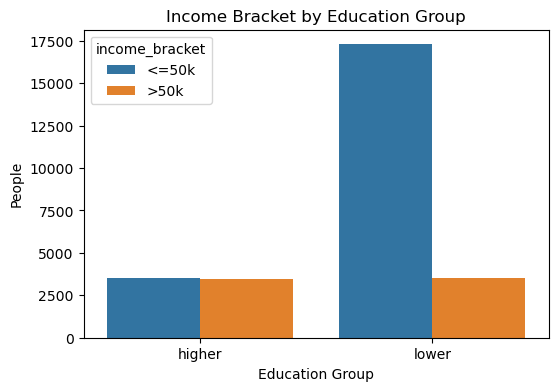

In [119]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_h2, x='education_group', hue='income_bracket')
plt.title('Income Bracket by Education Group')
plt.xlabel('Education Group')
plt.ylabel('People')
plt.show()

The analysis confirms that individuals with a bachelor’s degree or higher are significantly more likely to earn over $50K compared to those with lower levels of education. This supports the hypothesis that higher education acts as a strong income threshold, with a noticeable shift in income distribution at the bachelor's level.

While education alone doesn't guarantee high income, it clearly improves the likelihood, suggesting that educational attainment plays a major role in income mobility.

But just like with working hours, education alone doesn't guarantee a high income. This raises the question: what if we look at both education and work hours together?

To test this, Hypothesis 3 examines whether people who both have higher education and work more than 40 hours per week are significantly more likely to earn over $50K. The goal is to see if combining these two factors increases the chances more than either one alone.

## Hypothesis 3 High Education + Long Hours = High Income?

So far, the results have shown that both higher education and longer working hours are individually linked to a higher likelihood of earning over $50K. This leads to the third hypothesis:

"People with higher education who also work more than 40 hours per week are more likely to earn over $50K compared to those who only meet one or neither of these conditions."

Like the hypothesis 1 and 2, we start by creating a new dataframe to isolate the logic for the hypothesis:

In [110]:
df_h3 = df.copy()

Then we define the new columns:

In [111]:
higher_edu_levels = ['bachelors', 'masters', 'doctorate', 'prof-school']

df_h3['high_education'] = df_h3['education'].isin(higher_edu_levels)
df_h3['long_hours'] = df_h3['hours_per_week'] > 40
df_h3['high_edu_and_long_hours'] = df_h3['high_education'] & df_h3['long_hours']



In [113]:
df_h3[df_h3['high_edu_and_long_hours']]['income_bracket'].value_counts()


income_bracket
>50k     1932
<=50k    1149
Name: count, dtype: int64

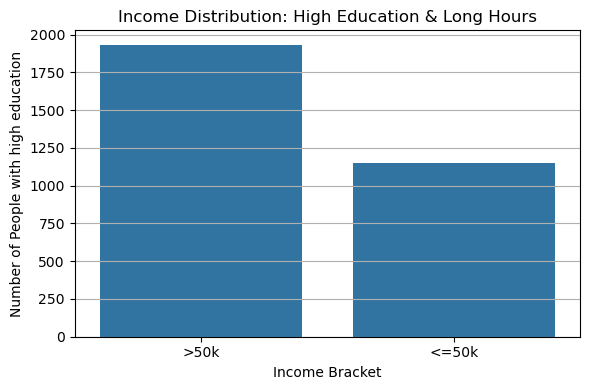

In [118]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_h3[df_h3['high_edu_and_long_hours']], x='income_bracket')

plt.title('Income Distribution: High Education & Long Hours')
plt.xlabel('Income Bracket')
plt.ylabel('Number of People with high education')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The analysis does not support the hypothesis. Even among individuals with both high education and long working hours, the majority still fall into the <=50K income bracket. This finding contradicts the initial assumption that a combination of high education and long working hours would be strongly associated with higher income levels.

## Conclusion

In this report, I used data from the 1994 U.S. Census to explore how education, working hours, job type, and gender relate to income. I wanted to find out what makes someone more likely to earn over $50,000 a year. The results showed that people with higher education and those who work more hours are more likely to have higher incomes. These patterns reflect social and economic trends in the U.S. during the 1990s.

Although the data only covers one year and doesn’t include all factors that affect income, it still gives useful insight into income differences. 

# References

<sup>1</sup> Chatgpt 4o